# 10.9 Lab: Deep Learning

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import json
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline

Using TensorFlow backend.


In [2]:
""" 
In Python, we use keras as the DL interface with backend Tensorflow.
pip install keras 
"""

' \nIn Python, we use keras as the DL interface with backend Tensorflow.\npip install keras \n'

## 10.9.1 A Single Layer Network on the Hitters Data

In [3]:
# In this exercise, we will use Hitters data set to predict the salary of a player
# I will skip the linear regression and Lasso part since we covered them in previous chapters

In [4]:
# read the data and take a look at the data and split it into train and test 
# I copied the code from chapter (because of laziness :- )
Hitters = pd.read_csv('data/Hitters.csv', header=0, na_values='NA')
Hitters = Hitters.dropna().reset_index(drop=True) # drop the observation with NA values and reindex the obs from 0
dummies = pd.get_dummies(Hitters[['League', 'Division', 'NewLeague']])

y = Hitters.Salary  # the response variable 
X_prep = Hitters.drop (['Salary', 'League', 'Division', 'NewLeague'], axis = 1).astype('float64')
X = pd.concat([X_prep,  dummies[['League_A', 'Division_E', 'NewLeague_A']]], axis=1)
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.66)


In [8]:
# the DL model is similar to other models implemeted in sklearn. 
# we first define the model, then fit the model, and finally predict the result

"""
I am listing out the hyperameters to be tuned. 
From this simple example with only one layer, we could get a sense of the number of hyperameters in NN.

Actually the number of the hyperameters gets exponentially larger as the number of layers increases.
"""
# define the model.model.add
dropout_rate = 0.4
first_layout = 50
epochs = 150
batch_size = 32
activation = 'relu'
loss = 'mean_squared_error'
optimizer = 'rmsprop'
metrics = ['mae']

model = Sequential()
model.add(Dropout(rate=dropout_rate, input_shape=(X_train.shape[1],)))
model.add(Dense(first_layout, activation=activation))
model.add(Dense(1))
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)
# we can use the model.summary() to see the structure of the model
print(model.summary())



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 51        
Total params: 39,301
Trainable params: 39,301
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# fit the model
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
print(model.summary())

Instructions for updating:
Use tf.cast instead.
Epoch 1/150


In [7]:
# evaluate the model
# model.evaluate returns the loss value & metrics values for the model in test mode.
mse_test, mae_test = model.evaluate(X_test, y_test)
print('Test mse: %.3f, Test mae: %.3f' % (mse_test, mae_test))

174/174 [==============================] - 1s 3ms/step
Test mse: 121353.647, Test mae: 200.669


## 10.9.2 A Multilayer Network on the MNIST Digit Data

In [2]:
# we could load the MNIST data set from keras.datasets
# keras.datasets also contains other well-known datasets, such as cifar10, fashion_mnist, etc.
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# since the data set if for image, so each image is a 28*28 matrix.
print(X_train.shape)
print(np.max(X_train))

# the y_train the group label for the training data
print(y_train.shape)
print(np.unique(y_train))

(60000, 28, 28)
255
(60000,)
[0 1 2 3 4 5 6 7 8 9]


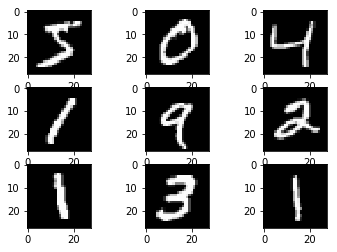

In [4]:
# let us plot some of the images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [5]:
# now let us reshape each image (i.e. matrix) to a vector
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')
""" 
We know that each pixel has its unique color code and also we know that it has a maximum value of 255. 
To perform Machine Learning, it is important to convert all the values from 0 to 255 for every pixel to 
a range of values from 0 to 1. The simplest way is to divide the value of every pixel by 255 to get the 
values in the range of 0 to 1.
"""
X_train = X_train / 255
X_test = X_test / 255

In [6]:
model = Sequential()
model.add(Dense(256, input_dim = 28 * 28, activation= 'relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(10, activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
